## Machine Failure Classification Project

## Importing all the necessary libraries

In [3]:
## Ignore all the non harmful warnings
from warnings import filterwarnings

filterwarnings("ignore")

## Read the file
import pandas as pd

## Data preprocessing and Data cleaning
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

## Split the data into training and testing
from sklearn.model_selection import train_test_split

## Algorithm Evaluation- models for classification problem
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

## Numeric python
import numpy as np

## Evaluation Metrics
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import (
    f1_score,
    ConfusionMatrixDisplay,
    classification_report,
    roc_curve,
)

## Data Ingestion

In [1]:
import pandas as pd

path = r"https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/machine-train.csv"
df = pd.read_csv(path)
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [2]:
df.shape

(136429, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [5]:
# check for missing data
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

## There are no missing values nor any duplicated rows in this data

## Separate X and Y features
    Y: Machine Failure
    0- not failed
    1-failed

In [7]:
df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [8]:
X = df.drop(columns=["id", "Product ID", "Machine failure"])
Y = df[["Machine failure"]]

In [9]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [10]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


## Data Preprocessing and Data cleaning

In [11]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [12]:
cat

['Type']

In [13]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [14]:
con_pipe = make_pipeline(SimpleImputer(strategy="mean"), StandardScaler())

In [15]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False),
)

In [16]:
pre = ColumnTransformer([("cat", cat_pipe, cat), ("con", con_pipe, con)]).set_output(
    transform="pandas"
)

In [17]:
X_pre = pre.fit_transform(X)
X_pre.head()

,cat__Type_H,cat__Type_L,cat__Type_M,con__Air temperature [K],con__Process temperature [K],con__Rotational speed [rpm],con__Torque [Nm],con__Tool wear [min],con__TWF,con__HDF,con__PWF,con__OSF,con__RNF
0,0.0,1.0,0.0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
1,0.0,0.0,1.0,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
2,0.0,1.0,0.0,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
3,0.0,1.0,0.0,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
4,0.0,0.0,1.0,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568


## Perform train test split

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre, Y, train_size=0.80, random_state=21
)

In [19]:
xtrain.head()

,cat__Type_H,cat__Type_L,cat__Type_M,con__Air temperature [K],con__Process temperature [K],con__Rotational speed [rpm],con__Torque [Nm],con__Tool wear [min],con__TWF,con__HDF,con__PWF,con__OSF,con__RNF
29391,0.0,1.0,0.0,-0.194806,0.620091,-0.225832,-0.017483,-0.506668,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
111006,0.0,1.0,0.0,0.073688,1.053251,0.372426,-0.546758,1.259929,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
16102,0.0,1.0,0.0,0.288483,0.475704,-0.658308,0.770549,1.338097,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
110599,0.0,0.0,1.0,1.040265,0.764477,0.985100,-0.864323,0.228111,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
84638,0.0,1.0,0.0,2.114241,2.280539,-0.506942,0.323605,-0.303431,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568


In [20]:
xtest.head()

,cat__Type_H,cat__Type_L,cat__Type_M,con__Air temperature [K],con__Process temperature [K],con__Rotational speed [rpm],con__Torque [Nm],con__Tool wear [min],con__TWF,con__HDF,con__PWF,con__OSF,con__RNF
22333,0.0,0.0,1.0,1.684651,1.702992,-0.283496,-0.240955,0.071775,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
35216,0.0,1.0,0.0,1.953144,1.558605,3.068191,-2.263961,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
112970,0.0,0.0,1.0,1.308759,0.836671,-0.622268,2.146663,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
14905,1.0,0.0,0.0,0.664374,0.331317,0.466129,-0.511473,-0.209629,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
25676,1.0,0.0,0.0,1.308759,1.269831,4.949460,-2.863806,-1.085111,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568


In [22]:
ytrain.head()

,Machine failure
29391,0
111006,0
16102,0
110599,0
84638,0


In [23]:
ytest.head()

,Machine failure
22333,0
35216,0
112970,0
14905,0
25676,0


## Model Building: Algorithm Evaluation

In [24]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
]

In [25]:
def eval_model(model, xtrain, ytrain, xtest, ytest):
    # Fit the model
    model.fit(xtrain, ytrain)

    # Predict the results
    ypred_test = model.predict(xtest)

    # Evaluate the scores
    f1_ts = f1_score(ytest, ypred_test, average="macro")
    scores = cross_val_score(model, xtrain, ytrain, scoring="f1_macro", cv=6)
    cv = scores.mean()

    # Return the result scores
    results = {"Model Name": type(model).__name__, "F1 score": f1_ts, "CV scores": cv}

    # return the above results
    return results

In [26]:
def eval_all_models(models, xtrain, ytrain, xtest, ytest):
    res = []
    # run a loop through all the base models
    for model in models:
        res_dct = eval_model(model, xtrain, ytrain, xtest, ytest)
        res.append(res_dct)

    # create a dataframe
    res_df = pd.DataFrame(res)

    # sort the dataframe on basis of cross validated scores
    res_df = res_df.sort_values(by="CV scores", ascending=False)

    # return the dataframe
    return res_df

In [27]:
models

[LogisticRegression(),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 GradientBoostingClassifier(),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               feature_weights=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=None,
               n_jobs=None, num_parallel_tree=None, ...)]

In [28]:
df_op = eval_all_models(
    models, xtrain.values, ytrain.values, xtest.values, ytest.values
)
df_op

,Model Name,F1 score,CV scores
0,LogisticRegression,0.926034,0.930785
2,RandomForestClassifier,0.928704,0.929560
3,GradientBoostingClassifier,0.925459,0.928872
4,XGBClassifier,0.925852,0.928562
1,DecisionTreeClassifier,0.880140,0.876553


## Considering Logistic Regression for final model building as it gives the highest score for CV

In [29]:
best_lr = LogisticRegression()
best_lr.fit(xtrain, ytrain)

LogisticRegression()

In [30]:
best_lr.score(xtrain, ytrain)

0.9962434604143189

In [31]:
best_lr.score(xtest, ytest)

0.9959686286007476

In [32]:
ypred_test = best_lr.predict(xtest)
ypred_test

array([0, 0, 0, ..., 0, 0, 0], shape=(27286,))

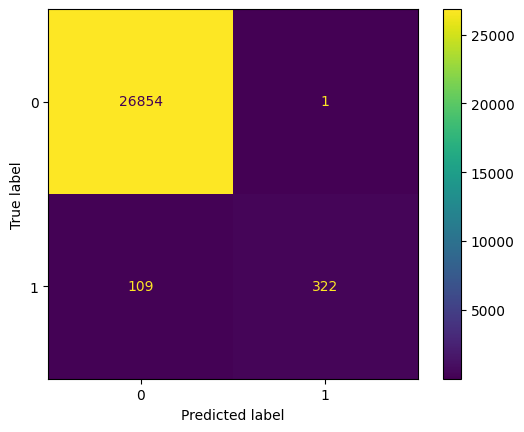

In [33]:
ConfusionMatrixDisplay.from_estimator(best_lr, xtest, ytest)

In [34]:
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26855
           1       1.00      0.75      0.85       431

    accuracy                           1.00     27286
   macro avg       1.00      0.87      0.93     27286
weighted avg       1.00      1.00      1.00     27286



In [35]:
from sklearn.metrics import RocCurveDisplay

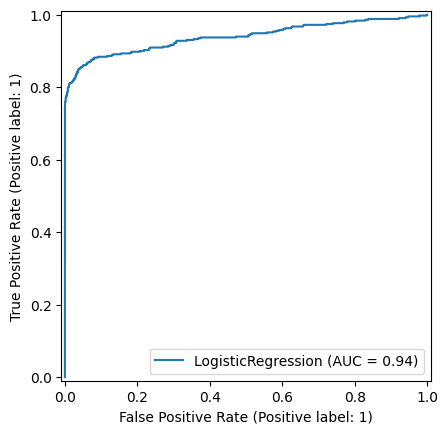

In [36]:
RocCurveDisplay.from_estimator(best_lr, xtest, ytest)

## Perform out of sample predictions

In [37]:
path2 = r"https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/machine-test.csv"
xnew = pd.read_csv(path2)
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [38]:
pre

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Type']),
                                ('con',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF'])])

In [40]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,cat__Type_H,cat__Type_L,cat__Type_M,con__Air temperature [K],con__Process temperature [K],con__Rotational speed [rpm],con__Torque [Nm],con__Tool wear [min],con__TWF,con__HDF,con__PWF,con__OSF,con__RNF
0,0.0,1.0,0.0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
1,0.0,1.0,0.0,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
2,0.0,1.0,0.0,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
3,0.0,0.0,1.0,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568
4,0.0,0.0,1.0,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568


In [41]:
machine_failure_predicted = best_lr.predict(xnew_pre)
machine_failure_predicted

array([0, 0, 0, ..., 0, 0, 0], shape=(90954,))

In [54]:
xnew.shape

(90954, 14)

## For probabilities

In [55]:
best_lr.predict_log_proba(xtest)

array([[-1.95667029e-03, -6.23748926e+00],
       [-2.18579998e-03, -6.12686609e+00],
       [-2.09745406e-02, -3.87491487e+00],
       ...,
       [-2.98516860e-03, -5.81559127e+00],
       [-1.96510831e-03, -6.23319031e+00],
       [-3.09236408e-03, -5.78036519e+00]], shape=(27286, 2))

In [59]:
machine_probs = best_lr.predict_proba(xnew_pre)
machine_probs

array([[0.99763872, 0.00236128],
       [0.99869815, 0.00130185],
       [0.99713481, 0.00286519],
       ...,
       [0.99697129, 0.00302871],
       [0.99727229, 0.00272771],
       [0.99760345, 0.00239655]], shape=(90954, 2))

In [60]:
machine_probs1 = best_lr.predict_proba(xnew_pre)[:, 1]
machine_probs1

array([0.00236128, 0.00130185, 0.00286519, ..., 0.00302871, 0.00272771,
       0.00239655], shape=(90954,))

In [42]:
xnew["Machine Failure"] = machine_failure_predicted
xnew.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF',
       'Machine Failure'],
      dtype='object')

In [61]:
xnew["Machine Failure Probabilities"] = machine_probs1
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine Failure,Machine Failure Probabilities
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0,0,0.002361
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0,0,0.001302
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0,0,0.002865
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0,0,0.003437
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0,0,0.003698


In [43]:
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine Failure
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0,0


In [45]:
xnew[xnew["Machine Failure"] == 1].count()

id                         1105
Product ID                 1105
Type                       1105
Air temperature [K]        1105
Process temperature [K]    1105
Rotational speed [rpm]     1105
Torque [Nm]                1105
Tool wear [min]            1105
TWF                        1105
HDF                        1105
PWF                        1105
OSF                        1105
RNF                        1105
Machine Failure            1105
dtype: int64

In [62]:
xnew.to_csv("Machine Failure predictions.csv", index=False)